<a href="https://colab.research.google.com/github/Zuoyu2524/Cycle-GAN/blob/main/LabSession1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab session 1 & 2: Introduction to PyTorch and Automatic Differentiation

Authors: [pierre.tandeo@imt-atlantique.fr](pierre.tandeo@imt-atlantique.fr), [lucas.drumetz@imt-atlantique.fr](lucas.drumetz@imt-atlantique.fr), [claire.scavinner-dorval@imt-atlantique.fr](claire.scavinner-dorval@imt-atlantique.fr), [sarah.reynaud@imt-atlantique.fr](sarah.reynaud@imt-atlantique.fr)

Year: 2022-2023

The aim of this practice is to explain $y$ (output variable) as a function of one or several $x$ (input variables) using neural networks. Here, $x$ are continuous and $y$ can be continuous (*regression*) or discrete (*classification*). These 2 aspects are treated in the deep learning framework. Both linear and nonlinear cases will be covered in this lab session.

We use the PyTorch library to implement deep learning architectures. This interface has the following characteristics:
- it is using tensors, kind of arrays that can be easily manipulated by GPUs
- it is using the automatic differentiation to easily compute the gradient of complex functions
- it is one of the most important deep learning library
- it can interact with classical machine learning libraries like *Scikit-learn*

This lab session is an introduction. It gives you the general concepts of neural nets and helps you to implement them using a dedicated Python library. If you want to play with similar regression and classification examples in small dimensions, you can use http://playground.tensorflow.org/. For more details concerning the implementation of PyTorch, please visit this tutorial at https://pytorch.org/tutorials/.

In [ ]:
# Import classic libraries (Matplotlib and PyLab)
%matplotlib inline
%pylab inline

# Import PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Parameters (figure size and random seed)
pylab.rcParams['figure.figsize'] = (15,15)
torch.manual_seed(1)

Populating the interactive namespace from numpy and matplotlib


**Linear regression**

Simple regression is a linear problem between continuous variables $x$ and $y$. Here, we write the model $y=2+0.5x$ and generate $y$ using an additional Gaussian standard random noise.

Text(0, 0.5, 'y')

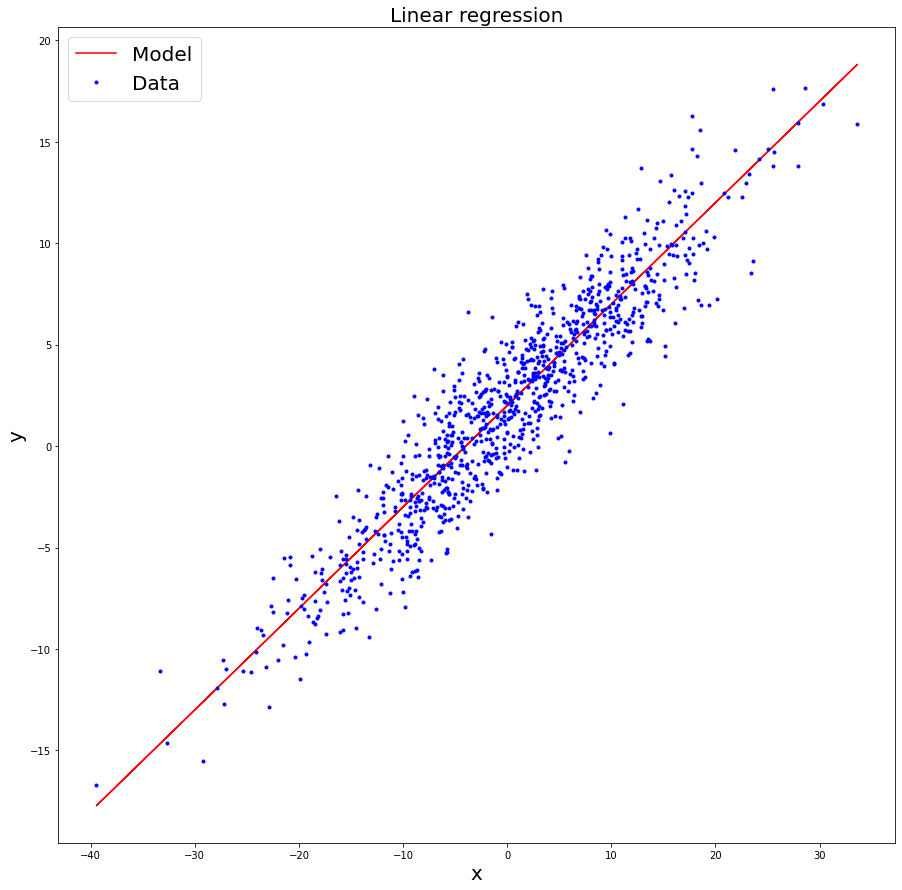

In [ ]:
# Generate data
x = torch.randn(1000, 1)*10 # input variable
y_true = 2 + 0.5*x # true model
y = y_true + torch.randn(1000, 1)*2 # add noise to the truth

# Plot noisy data and true model
plot(x, y_true, 'r')
plot(x, y, 'b.')
legend(['Model', 'Data'], prop={'size': 20})
title('Linear regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)

The objective is to build a neural net to fit the relationship between $x$ and $y$. In PyTorch, it is necessary to create a specific class for each neural network architecture. Below, we declare the neural network corresponding to a linear regression.

In [ ]:
# Declare a class for linear regression
class linear_regression_nn(nn.Module):

    # class initialization
    def __init__(self, input_size, output_size):
        super(linear_regression_nn, self).__init__()
        # fully connected layer with linear activation
        self.fc = nn.Linear(input_size, output_size)

    # function to apply the neural network
    def forward(self, x):
        y_pred = self.fc(x)
        return y_pred

Then, we create a neural network based on the specific architecture declared above. We finally check the values of the parameters (randomly generated).

In [ ]:
# Create the neural network (1 input size for x and 1 output size for y, bias is declared by default)
linear_regression_model = linear_regression_nn(1, 1)

# Print the model architecture
print(linear_regression_model)

# Print the model parameters (weights of the neural network)
slope, bias = linear_regression_model.parameters()
print('Slope: ', slope)
print('Bias: ', bias)

linear_regression_nn(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
Slope:  Parameter containing:
tensor([[0.0292]], requires_grad=True)
Bias:  Parameter containing:
tensor([-0.5334], requires_grad=True)


<img src="https://tandeo.files.wordpress.com/2020/09/simple_regression_dl.png">

In order to quantify the quality of the fit given by the neural network, we define a loss function. For a regression problem, the classic loss function is the Mean Squared Error (MSE). But other loss functions are already defined in PyTorch: https://pytorch.org/docs/stable/nn.html#loss-functions.

Then, to compute the gradient of the loss function w.r.t. the parameters of the neural network, we use an optimization technique. A classic procedure is the Stochastic Gradient Descent (SQG). Other optimizers are coded in PyTorch: https://pytorch.org/docs/stable/optim.html#.

In [ ]:
# Loss function: MSE = sum [(y - y_pred)^2], with y_pred = w0 + w1*x
criterion = nn.MSELoss()

# Optimizer: new_parameters = old_parameters - lr*gradient, with lr the learning rate
optimizer = torch.optim.SGD(linear_regression_model.parameters(), lr = 0.001)

Now, we fit the neural network using the ($x$, $y$) dataset. At each iteration (epoch), the loss function is stored and the estimated regression line is plotted.

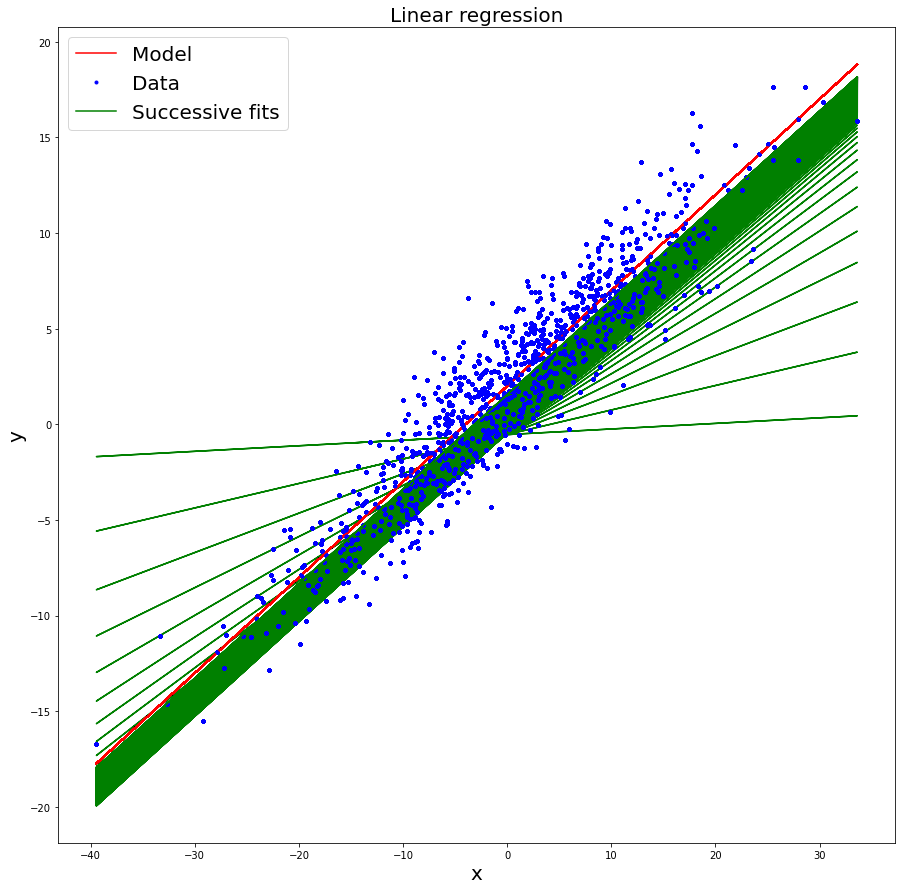

In [ ]:
epochs = 1000 # number of epochs
losses = [] # list to stock the loss at each iteration

# Loop on epochs
for i in range(epochs):

    # compute the prediction using the previous parameters of the neural network
    y_pred = linear_regression_model.forward(x)

    # compute and stock the loss
    loss = criterion(y_pred, y)
    losses.append(loss.detach().numpy())

    # initialize the gradient to zero
    optimizer.zero_grad()

    # compute the gradient by back propagation
    loss.backward()

    # update the parameter values using the gradient
    optimizer.step()

    # plot the adjustment at each epoch
    plot(x, y_true, 'r')
    plot(x, y, 'b.')
    plot(x, y_pred.detach().numpy(), 'g')
    legend(['Model', 'Data', 'Successive fits'], prop={'size': 20})
    title('Linear regression', size=20)
    xlabel('x', size=20)
    ylabel('y', size=20)

It is important to check that the loss function is decreasing. If not, it maybe means that the learning rate in the optimization procedure is too large.

Text(0, 0.5, 'Loss value')

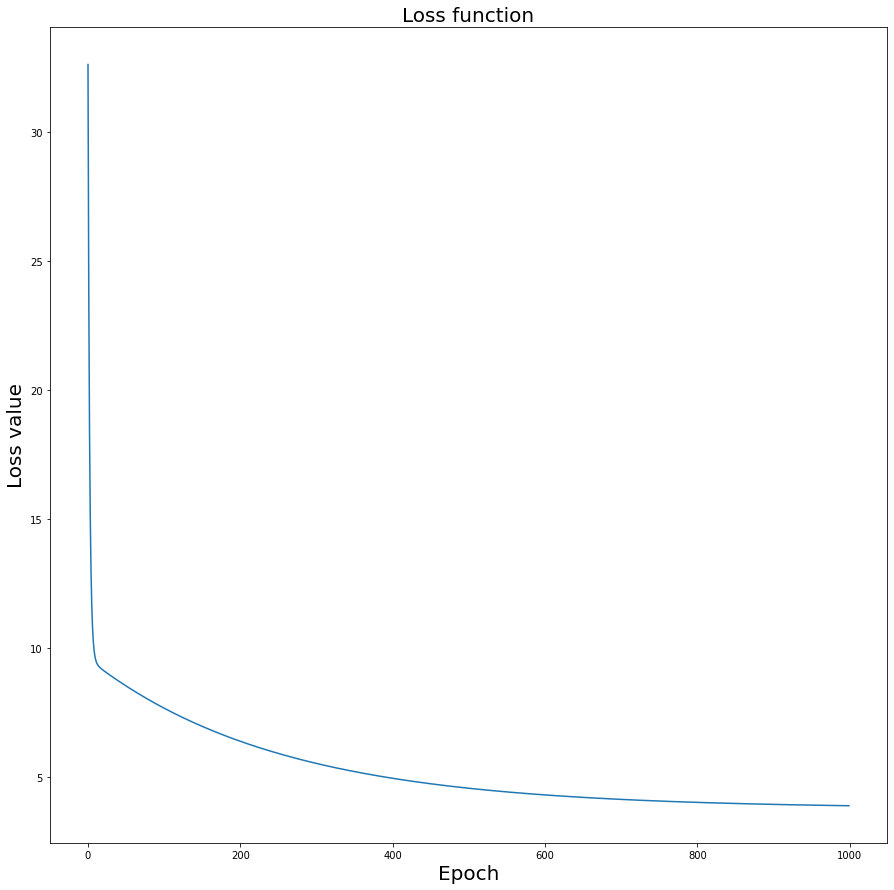

In [ ]:
# Print the loss function
plot(range(epochs), losses)
title('Loss function', size=20)
xlabel('Epoch', size=20)
ylabel('Loss value', size=20)

Finally, let's check if the estimated parameters (at the last epoch) are close to the true ones (i.e., $0.5$ for the slope and $2$ for the bias).

In [ ]:
# Extract and print the model parameters (weights of the neural network)
slope, bias = linear_regression_model.parameters()
print('Slope: ', slope)
print('Bias: ', bias)

Slope:  Parameter containing:
tensor([[0.4941]], requires_grad=True)
Bias:  Parameter containing:
tensor([1.5506], requires_grad=True)


**Nonlinear regression**

Now, we perform a multiple regression between continuous variables $x$ and $y$. Here, we write the nonlinear model $y=2+0.5x-0.05x^2$ and generate $y$ using an additional Gaussian standard random noise.

Text(0, 0.5, 'y')

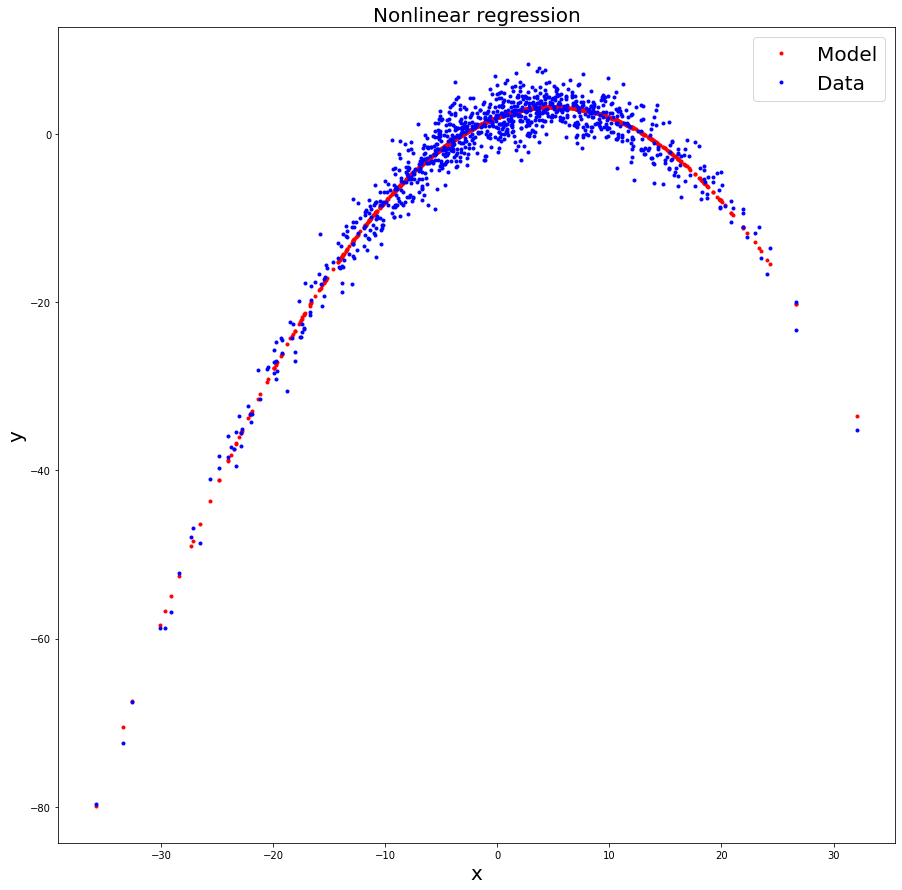

In [ ]:
# Generate data
x = torch.randn(1000, 1)*10 # input variable
y_true = 2 + 0.5*x - 0.05*x**2 # true model
y = y_true + torch.randn(1000, 1)*2 # add noise to the truth

# Plot noisy data and true model
plot(x, y_true, 'r.')
plot(x, y, 'b.')
legend(['Model', 'Data'], prop={'size': 20})
title('Nonlinear regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)A neural network is based on the minimization of a cost function (also called loss function) w.r.t. to some parameters, these parameters corresponding to the weights of the network. The loss function measures the adequacy between the observed data and the model (i.e., the neural network).

In deep learning architectures, a loss function is corresponding to a succession of several activation functions (e.g., linear, ReLU, sigmoid). The minimization of the loss function is performed using gradient descent algorithms, and computation of the gradients is performed using automatic differentiation.

We declare the neural network corresponding to a nonlinear regression. The nonlinearities are introduced by a hidden layer with ReLu activations. Other activation functions are available in PyTorch: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity.

In [ ]:
# Declare a class for nonlinear regression
class nonlinear_regression_nn(nn.Module):

    # class initialization
    def __init__(self, input_size, hidden_size, output_size):
        super(nonlinear_regression_nn, self).__init__()
        # fully connected layer with linear activation
        self.fc0 = nn.Linear(input_size, hidden_size)
        # ReLu activation
        self.relu = nn.ReLU()
        # fully connected layer with linear activation
        self.fc1 = nn.Linear(hidden_size, output_size)

    # function to apply the neural network
    def forward(self, x):
        out = self.fc0(x)
        out = self.relu(out)
        y_pred = self.fc1(out)
        return y_pred

# Create the neural network (1 input size for x, 6 neurons in the hidden layer, and 1 output size for y)
nonlinear_regression_model = nonlinear_regression_nn(1, 6, 1)

We then can check the structure of the network and see the parameter vales (randomly generated).

In [ ]:
# Print the model parameters (weights of the neural network)
for name, param in nonlinear_regression_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc0.weight tensor([[-0.7187],
        [-0.3857],
        [-0.2343],
        [-0.5503],
        [-0.1648],
        [ 0.6943]])
fc0.bias tensor([ 0.5165, -0.6734,  0.6508,  0.2039,  0.1187,  0.0865])
fc1.weight tensor([[-0.2019, -0.3385,  0.0936,  0.3533, -0.3352,  0.3632]])
fc1.bias tensor([0.2127])


<img src="https://tandeo.files.wordpress.com/2020/09/multiple_regression_dl.png">

We still use the SGD optimzer and MSE loss function.

In [ ]:
# Loss function: MSE = sum [(y - y_pred)^2]
criterion = nn.MSELoss()

# Optimizer: new_parameters = old_parameters - lr*gradient, with lr the learning rate
optimizer = torch.optim.SGD(nonlinear_regression_model.parameters(), lr = 0.001)

Now, we fit the neural network using the ($x$, $y$) dataset.

In [ ]:
epochs = 20000 # number of epochs
losses = [] # list to stock the loss at each iteration

# Loop on epochs
for i in range(epochs):

    # compute theA neural network is based on the minimization of a cost function (also called loss function) w.r.t. to some parameters, these parameters corresponding to the weights of the network. The loss function measures the adequacy between the observed data and the model (i.e., the neural network).

#In deep learning architectures, a loss function is corresponding to a succession of several activation functions (e.g., linear, ReLU, sigmoid). The minimization of the loss function is performed using gradient descent algorithms, and computation of the gradients is performed using automatic differentiation.nlinear_regression_model.forward(x)

    # compute and stock the loss
    loss = criterion(y_pred, y)
    losses.append(loss.detach().numpy())

    # initialize the gradient to zero
    optimizer.zero_grad()

    # compute the gradient by back propagation
    loss.backward()

    # update the parameter values using the gradient
    optimizer.step()

The loss function is then plotted.

Text(0, 0.5, 'Loss value')

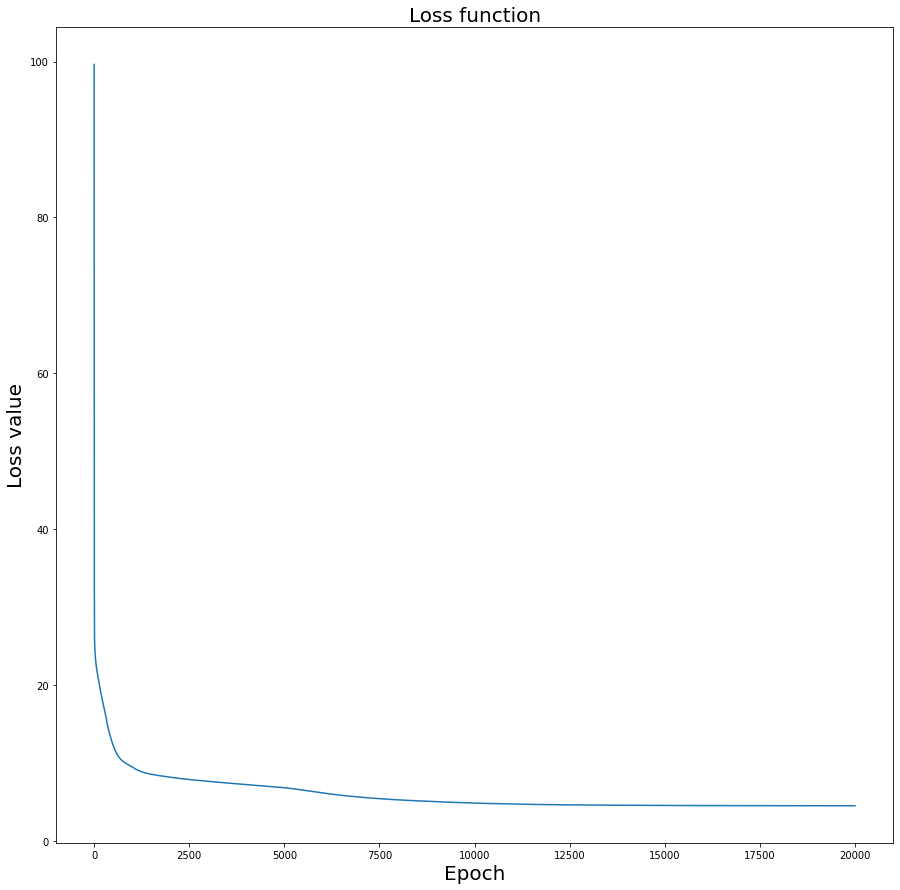

In [ ]:
# Print the loss function
plot(range(epochs), losses)
title('Loss function', size=20)
xlabel('Epoch', size=20)
ylabel('Loss value', size=20)

Finally, the estimated model (last iteration of the neural network) is plotted.

Text(0, 0.5, 'y')

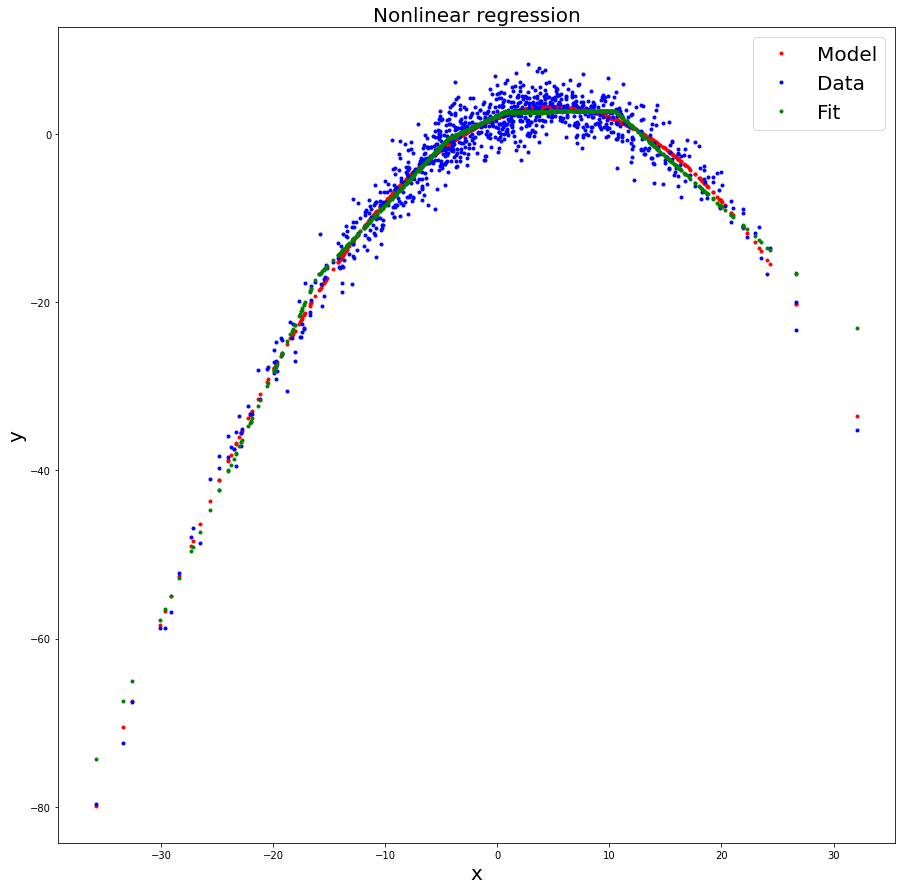

In [ ]:
# plot the adjustment at the last epoch
plot(x, y_true, 'r.')
plot(x, y, 'b.')
plot(x, y_pred.detach().numpy(), 'g.')
legend(['Model', 'Data', 'Fit'], prop={'size': 20})
title('Nonlinear regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)

**Logistic regression (binary classification)**

In a classification problem, $y$ is a discrete variable with various classes. Here, $y$ is binary and takes its values between $0$ and $1$. We write the model as $y=f\left(2+0.5 x\right)$ with $f$ the logistic transfer function (sigmoid). As previously, we generate $y$ adding Gaussian perturbations.

Text(0, 0.5, 'y')

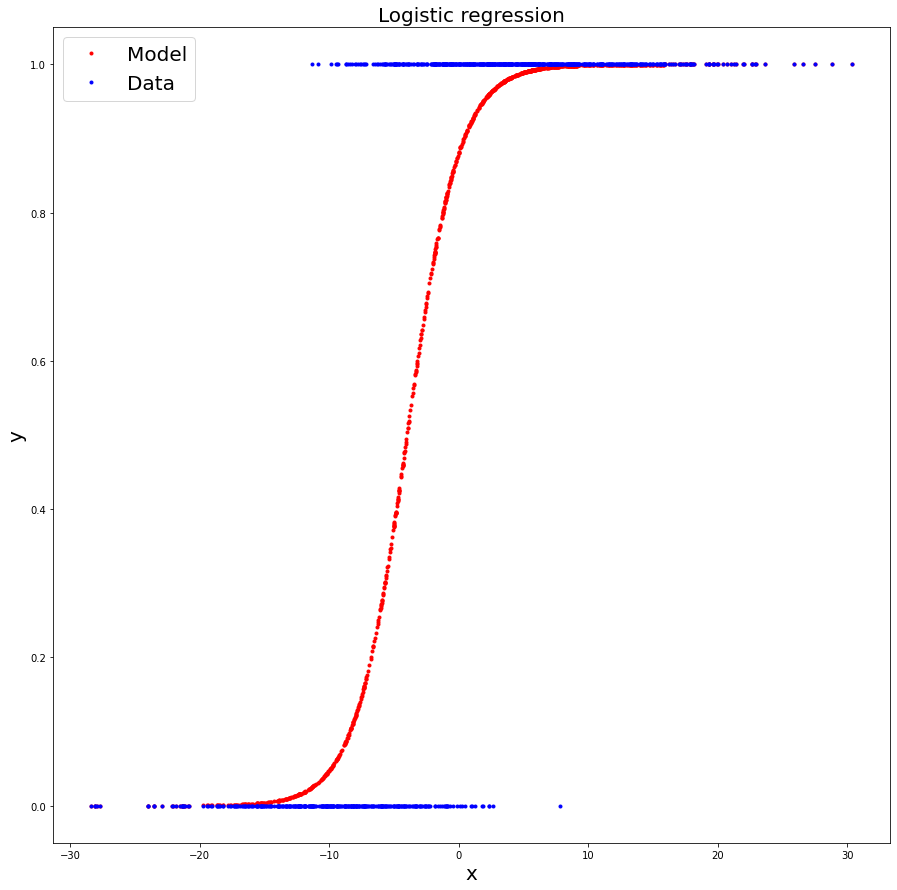

In [ ]:
# Generate data
x = torch.randn(1000, 1)*10 # input variable
y_true = 1 / (1 + exp(-(2 + 0.5*x))) # true model
y_noise = 1 / (1 + exp(-(2 + 0.5*x + torch.randn(1000, 1)*2))) # add noise to the truth
y = (y_noise>0.5).float() # transform to binary data

# Plot noisy data and true model
plot(x, y_true, 'r.')
plot(x, y, 'b.')
legend(['Model', 'Data'], prop={'size': 20})
title('Logistic regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)

Define your own neural network to fit the data generated below. Be careful, the logistic regression is a classification problem. The output $y$ is binary. You thus have to use appropriate activation and loss functions.

<img src="https://tandeo.files.wordpress.com/2020/09/logistic_regression_dl.png">

In [ ]:
class LR_classification:
  def __init__(self):
    self.dimention = 2
    self.w = torch.ones(2)
    self.alpha = 0.2

  def f_sigmoid(self, x):
    return 1/(1+exp(-x))

  def loss_function(self, x, y, w):
    if self.f_sigmoid(torch.dot(w, x)) == torch.zeros(1) or self.f_sigmoid(torch.dot(w, x)) == torch.ones(1):
      return 0
    return y*log(self.f_sigmoid(torch.dot(w, x)))+(1-y)*log(1-self.f_sigmoid(torch.dot(w, x)))

  def classification(self, x, y, n, alpha):
    times = 0
    m = x.shape[0]
    self.alpha = alpha
    loss = []
    while times<n:
      times += 1
      gradient = 0
      s_loss = 0
      for i in zip(x,y):
        s = torch.cat((i[0],torch.ones(1)), 0)
        gradient += (self.f_sigmoid(torch.dot(self.w, s))-i[1])*s
        s_loss += self.loss_function(s, i[1], self.w)
      self.w -= self.alpha*gradient/m
      loss.append(-s_loss)
    plot(range(0,n),loss)
    return self.w

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


tensor([0.4277, 1.8232])


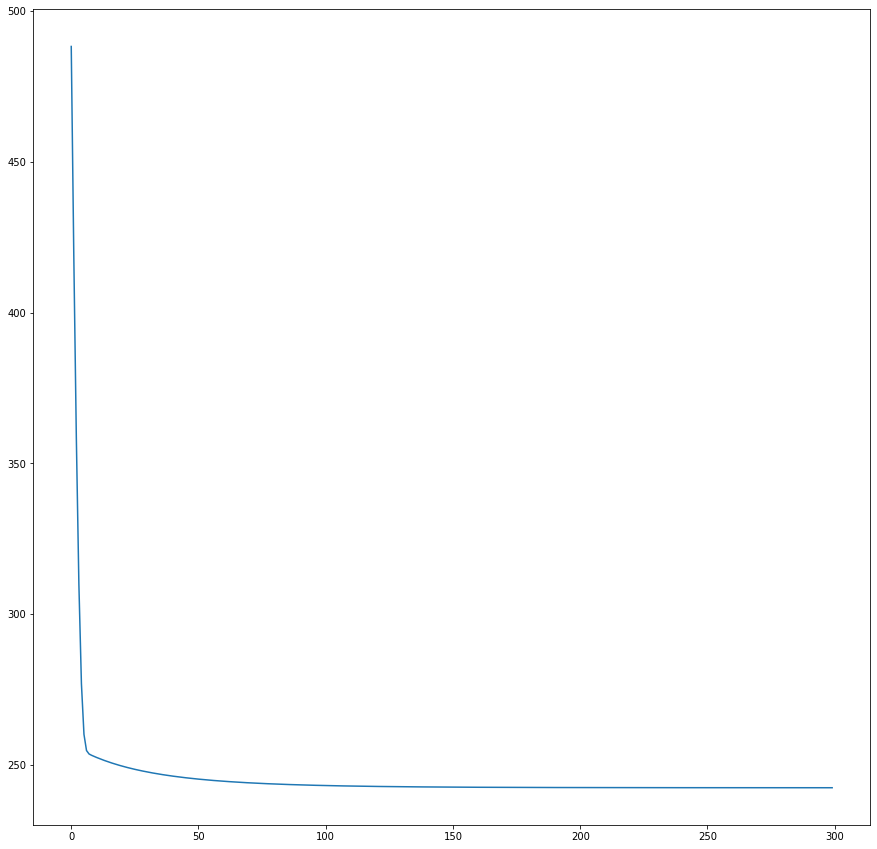

In [ ]:
if __name__ == '__main__':
    lr = LR_classification()
    w = lr.classification(x, y, 300, 0.3)
    print(w)

**Automatic differentiation of the sigmoid function**

A neural network is based on the minimization of a cost function (also called loss function) w.r.t. to some parameters, these parameters corresponding to the weights of the network. The loss function measures the adequacy between the observed data and the model (i.e., the neural network).

In deep learning architectures, a loss function is corresponding to a succession of several activation functions (e.g., linear, ReLU, sigmoid). The minimization of the loss function is performed using gradient descent algorithms, and computation of the gradients is performed using automatic differentiation.

Below, we define a sigmoid function, well known in neural networks, especially for classification problems. The analytic derivative of the sigmoid function is also defined.

In [ ]:
# Define the sigmoid function
def f(x):
    return (torch.sigmoid(x))

# Define the first derivative of the sigmoid function
def f_prime(x):
    return (torch.exp(-x) / (1 + torch.exp(-x))**2)

Then, we compare the analytic solution to the approximation computed by automatic differentiation in PyTorch.

Text(0.5, 0, 'x')

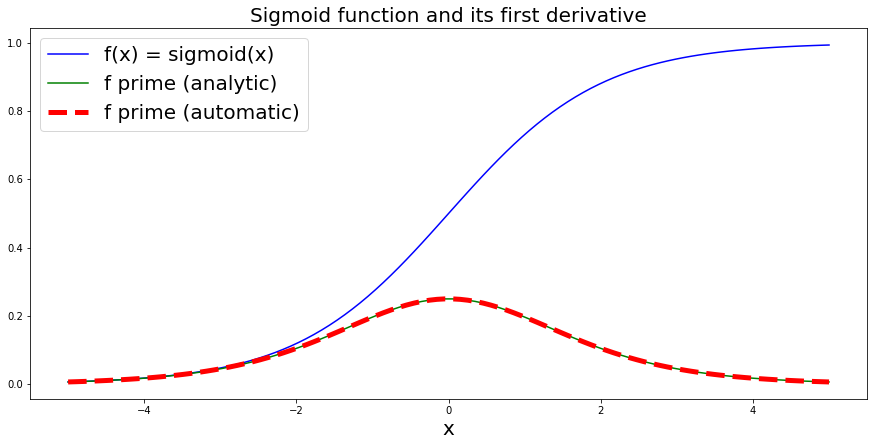

In [ ]:
# Generate data
x = torch.linspace(-5.0, 5.0, 100, requires_grad=True)
f_x = f(x)
f_prime_x = f_prime(x)

# Apply the automatic differentiation
y = torch.sum(f(x))
y.backward(retain_graph=True)
x.grad

# Plot results
subplot(2,1,1)
plot(x.detach().numpy(), f_x.detach().numpy(), 'b')
plot(x.detach().numpy(), f_prime_x.detach().numpy(), 'g')
plot(x.detach().numpy(), x.grad.detach().numpy(), 'r--', linewidth=5)
legend(['f(x) = sigmoid(x)', 'f prime (analytic)', 'f prime (automatic)'], prop={'size': 20})
title('Sigmoid function and its first derivative', size=20)
xlabel('x', size=20)

The analytic derivative and the one estimated by automatic differentiation are similar.

**Optimization of a 2D function using automatic differentiation**

Now, let's take an example of classification with several inputs $x_1, x_2, x_1^2, x_2^2, x_1 x_2$ (resulting in nonlinearities) and a binary output $y$ (i.e., $y=0$ or $y=1$). We define a model $f$ with 6 parameters $w$, including the bias, such that $f(x_1, x_2, w) = sigmoid{(w_0 + w_1 x_1 + w_2 x_2 + w_{11} x_1^2 + w_{22} x_2^2 + w_{12} x_1 x_2)}$. The binary output $y$ is defined as the following: if $f(x_1, x_2, w)\leq0.5$ then $y=0$, and if $f(x_1, x_2, w)>0.5$ then $y=1$.

The goal here is to: (i) generate $x_1$, $x_2$, and $y$ data, (ii) estimate the $w$ parameters using a classic gradient-descent optimization procedure based on automatic differentiation, (iii) compare the estimated parameters with the true ones.

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


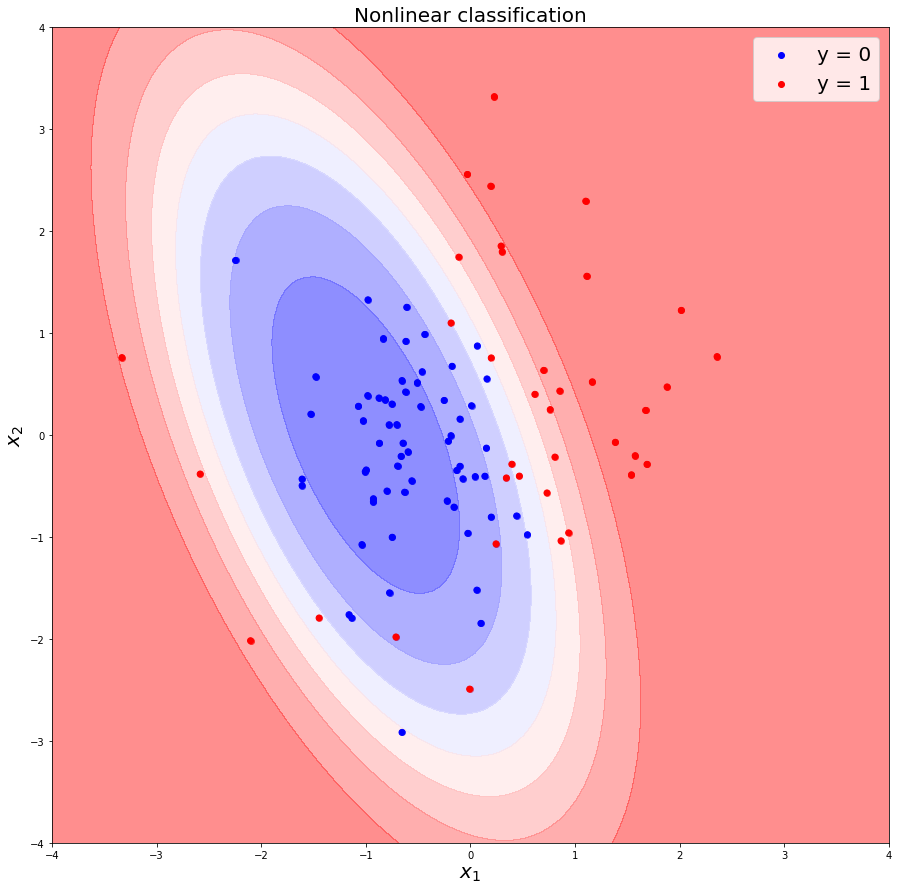

In [ ]:
# Fix the seed
torch.manual_seed(1)

# Input variables
x1 = torch.randn(100, 1)
x2 = torch.randn(100, 1)

# True parameters
w0 = -0.5
w1 = 1.5
w2 = 0.5
w11 = 0.75
w22 = 0.25
w12 = 0.5

# Noise
epsilon = torch.randn(100, 1)/3

# Output variable
y_noise = torch.sigmoid(w0 + w1*x1 + w2*x2 + w11*x1**2 + w22*x2**2 + w12*x1*x2 + epsilon)
y = (y_noise>0.5).float() # transform to binary data

# For visualization
X1, X2 = torch.meshgrid(torch.linspace(-4, 4, 100), torch.linspace(-4, 4, 100))
Y = torch.sigmoid(w0 + w1*X1 + w2*X2 + w11*X1**2 + w22*X2**2 + w12*X1*X2)

# Plot data
scatter(x1[y==0], x2[y==0], c='b')
scatter(x1[y==1], x2[y==1], c='r')
contourf(X1, X2, Y, cmap='bwr', alpha=0.5)
scatter(x1, x2, c=y, cmap='bwr')
xlabel("$x_1$", fontsize=20)
ylabel("$x_2$", fontsize=20)
title('Nonlinear classification', size=20)
legend(['y = 0', 'y = 1'], prop={'size': 20})

Firstly, define the loss function for such a binary classification. A classic one is the BCE defined as $\sum_{i=1}^n \left[ - y_i \log(\hat{y}_i) - (1 - y_i) \log(1 - \hat{y}_i) \right]$, with $\hat{y}$ the prediction of the model $f(x_1, x_2, w)$, defined by the 6 parameters $w$ and the input variables $x_1, \dots, x_1 x_2$.

In [ ]:
def loss_function(x, y, w):
  result = torch.zeros(1)
  for (i,j) in zip(x,y):
    s = torch.tensor([torch.ones(1), i[0], i[1], i[0]**2, i[1]**2, i[0]*i[1]])
    y_p = torch.sigmoid(torch.dot(s,w))
    result = torch.cat((result, -j*torch.log(y_p)-(1-j)*torch.log(1-y_p)), 0)
  return result

Secondly, we use the *autograd* module of PyTorch to compute automatically the gradient of the loss function defined before. As an example, we evaluate for instance the gradient when $w$ parameters are randomly sampled using a Gaussian distribution with mean $0$ and variance $1/n$, with $n$ the number of parameters. The parameter $w_0$, corresponding to the bias, is initialize with zero. More details about the initialization of a neural network are discussed here: https://www.deeplearning.ai/ai-notes/initialization/).

In [ ]:
from torch.autograd import Variable

# Define initial parameter values
w = Variable(torch.cat((torch.zeros(1), torch.randn(5)*sqrt(1/6))), requires_grad = True)

# compute the loss
x = torch.cat((x1,x2), 1)
loss = torch.sum(loss_function(x, y, w))

# Apply backpropagation
loss.backward(retain_graph=True)

# Compute the gradient of the loss function evaluated at w
gradient = w.grad

# Print results
print('Loss: ', loss)
print('Gradient: ', gradient)

Loss:  tensor(85.9800, grad_fn=<SumBackward0>)
Gradient:  tensor([  0.9445, -24.6833,  -7.0487, -35.0421, -34.3833,  -7.6024])


Thirdly, implement your own gradient descent algorithm to iteratively update the parameters $w$ of your model. To generate the initial condition of your algorithm (i.e., the initial set of parameters $w$), use the same random procedure as below. Use a classic learning rate of $10^{-4}$.


Plot the results of your classification model. Also check the estimated parameter values, they may be different from the real ones.

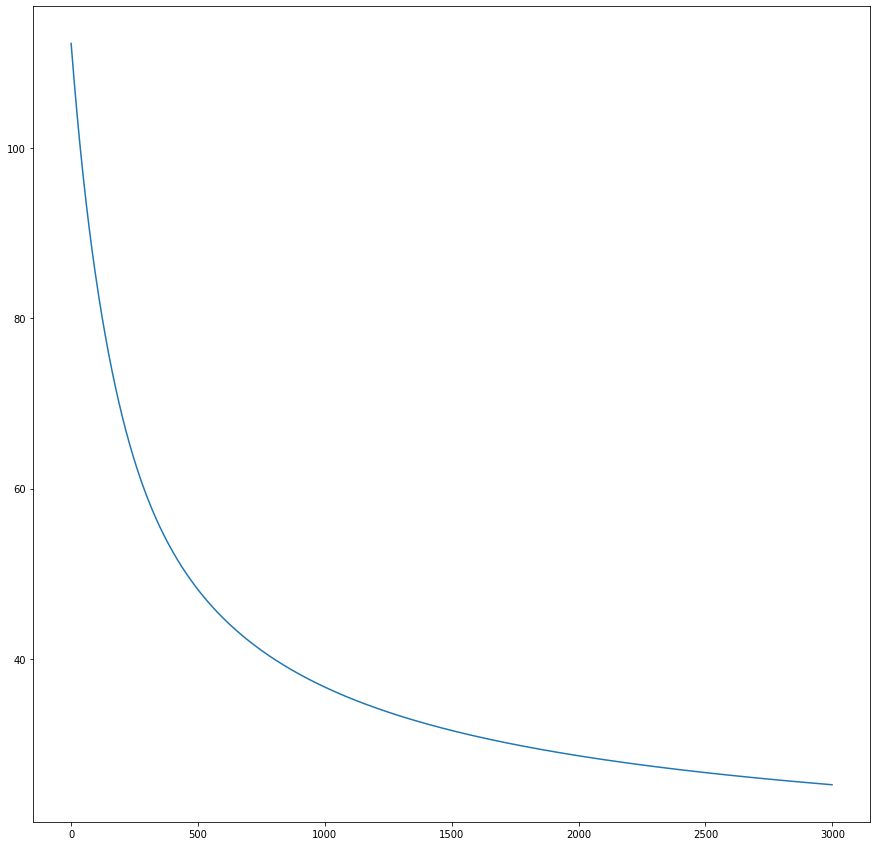

In [ ]:
lr = 1e-4
n = 3000
i = 0
# Define initial parameter values
w = Variable(torch.cat((torch.zeros(1), torch.randn(5)*sqrt(1/6))), requires_grad = True)

# compute the loss
x = torch.cat((x1,x2), 1)
loss_list = []
while i<n:
  i += 1
  loss = torch.sum(loss_function(x, y, w))
  loss_list.append(loss.detach().numpy())
  # Apply backpropagation
  loss.backward(retain_graph=True)
  # Compute the gradient of the loss function evaluated at w
  gradient = w.grad
  w = torch.sub(w, lr*gradient)

  w = Variable(w, requires_grad = True)
plot(range(n), loss_list)

Finally, implement this classification using a neural network defined using PyTorch, as in the first examples (linear, nonlinear and logistic regressions) of this practice. We suggest to implement a MLP (multilayer perceptron) with at least 2 hidden layers. The input layer must be only $x_1$ and $x_2$.

<img src="https://tandeo.files.wordpress.com/2020/09/classification_dl.png">

In [ ]:
class class_nn(nn.Module):

    # class initialization
    def __init__(self, input_size, output_size):
        super(class_nn, self).__init__()
        # fully connected layer with linear activation
        self.fc1 = nn.Linear(input_size, 20)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()
        self.fc2 = nn.Linear(20,10)
        self.fc3 = nn.Linear(10, output_size)

    # function to apply the neural network
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sig(x)
        return x

model = class_nn(2, 1)

In [ ]:
criterion = nn.BCELoss()
#criterion = nn.MSELoss()
sig = nn.Softmax()
# Optimizer: new_parameters = old_parameters - lr*gradient, with lr the learning rate
optimizer = torch.optim.SGD(nonlinear_regression_model.parameters(), lr = 0.001)

In [ ]:
epochs = 20000 # number of epochs
losses = [] # list to stock the loss at each iteration
x = torch.cat((x1,x2), 1)

# Loop on epochs
for i in range(epochs):
    # compute the prediction using the previous parameters of the neural network
    print(x)
    y_pred = sig(model(x))

    loss = criterion(y_pred, y)
    print(loss)
    # compute and stock the loss
    losses.append(loss.detach().numpy())

    # initialize the gradient to zero
    optimizer.zero_grad()

    # compute the gradient by back propagation
    loss.backward()

    # update the parameter values using the gradient
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


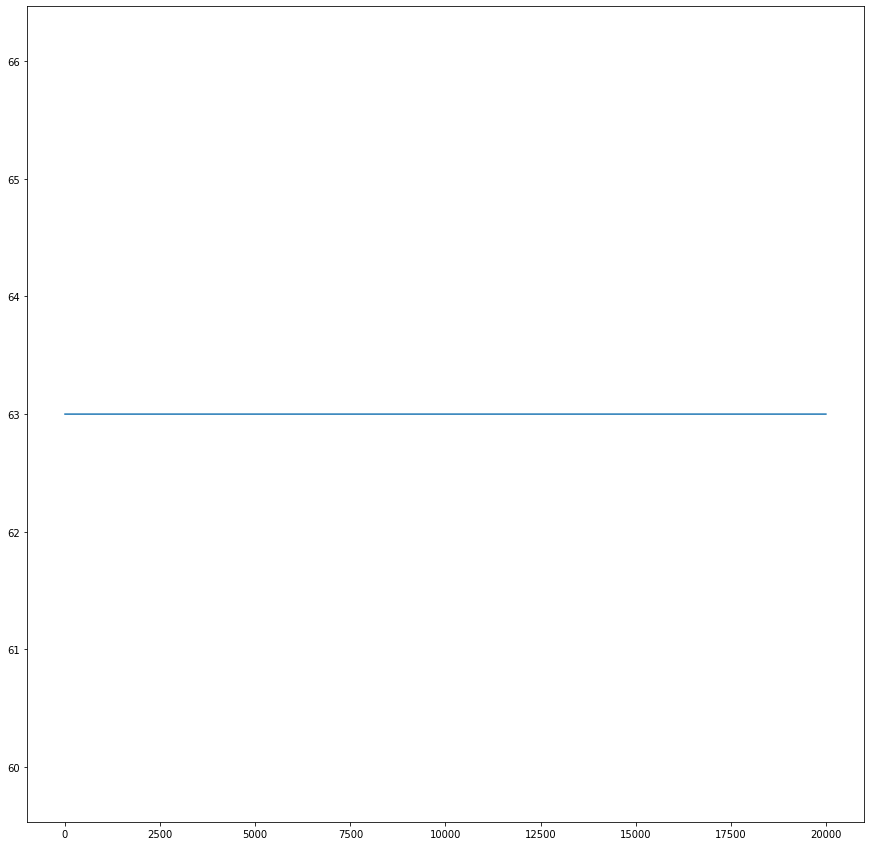

In [ ]:
plot(range(epochs), losses)